In [ ]:
using Plots
x = ["x1", "x2"]
y = [0.2, 0.7]
bar(x, y)

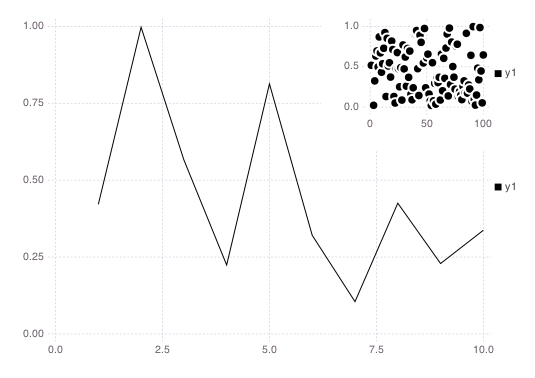

In [9]:
using Plots; using Compose
p1 = plot(rand(10))
p2 = scatter(rand(100))
compose(context(),
    (context(0.6,0,0.4,0.4), Gadfly.render(p2.o[2])),
    (context(0,0,1,1), Gadfly.render(p1.o[2])))

In [2]:
using Gadfly

In [4]:
Pkg.add("Contour")

INFO: No packages to install, update or remove
INFO: Package database updated


In [9]:
using Plots
import Contour
default(size=(500,300))

In [21]:
n = 100
x = sort(randn(n)); y = sort(randn(n))
cs = Contour.contours(x, y, x * y', 5)
@show typeof(cs) length(cs)
#xys = [Contour.coordinates(c.lines) for c in cs]
for clevel in cs
    @show length(clevel.lines)
    #for (x,y) in Contour.coordinates(clevel.lines[1])
    #    @show x y
    #end
end

typeof(cs) = Array{Contour.ContourLevel,1}

x = [0.996311623950869,1.014779586168885,1.0619429011645203,1.0705643632344357,1.0757346819029472,1.2352537493424733,1.3083367492687343,1.3362429344485531,1.3382013214101371,1.381189378592954,1.387758007376257,1.4330616775674128,1.4330873131641844,1.4802974364117303,1.5983182860133243,1.7395968844958194,1.8898088744099915,1.9983557145685487,2.0028308618853106,2.0112886298409127,2.0289470759898443,2.074888219238593,2.10414834798257,2.1510008635888065,2.2151888265553907,2.241346798167681,2.3299639292951215,2.3944690872276184,2.593030479782728,2.6035782354641266,2.620319713774897,2.6412138619889283,2.69457070468019,2.712098273036215,2.844711254707502,2.9183936196692386]

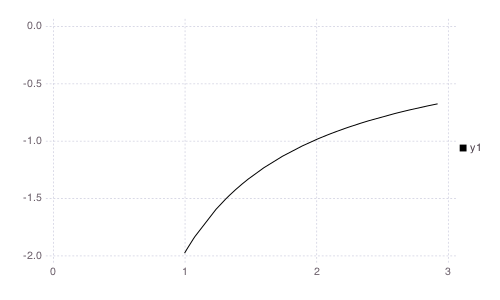


y = [-1.9760705052937122,-1.9401080205046,-1.8539433824658917,-1.8390132174981266,-1.8301743425134045,-1.5938280011038843,-1.5047976106082777,-1.4733713185043547,-1.4712151173905417,-1.4254251043953374,-1.4186781871955039,-1.3738292252100077,-1.3738046496438667,-1.3299908286965345,-1.2317834510179533,-1.1317461141241336,-1.0417889559256392,-0.9852009828969108,-0.9829996389796655,-0.9788659792335812,-0.9703466578644496,-0.9488617246538046,-0.9356669248431247,-0.9152864824451101,-0.8887648721269691,-0.8783924093228624,-0.8449839027191308,-0.8222206854422591,-0.7592591099567633,-0.7561831587594401,-0.7513518307788163,-0.7454080271591599,-0.7306477468752341,-0.7259257652070719,-0.6920850089486591,-0.6746115400271908]




In [23]:
x, y = Contour.coordinates(cs[2].lines[2])
@show x y
plot(x,y)

In [26]:
Pkg.add("GeometricalPredicates")
Pkg.clone("https://github.com/JuliaGeometry/VoronoiDelaunay.jl")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of GeometricalPredicates
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Cloning VoronoiDelaunay from https://github.com/JuliaGeometry/VoronoiDelaunay.jl
INFO: Computing changes...
INFO: No packages to install, update or remove
INFO: Package database updated


In [ ]:
using Plots
default(size=(500,300))
n = 100
x = randn(n)*3
y = randn(n)*3
z = Float64[sin(x[i]) + cos(y[i]) for i in 1:n]
scatter(x,y,z=z,c=:heat)

In [13]:
using VoronoiDelaunay
tess = DelaunayTessellation()
tmin, tmax = min_coord, max_coord
twidth = tmax - tmin
function squash(a)
    amin, amax = extrema(a)
    v = similar(a)
    for i in eachindex(a)
        v[i] = tmin + twidth * (a[i] - amin) / (amax - amin)
    end
    v
end
function zippoints(x, y)
    Point2D[Point(x[i], y[i]) for i in eachindex(x)]
end
function zippoints(x, y, z)
    Point3D[Point(x[i], y[i], z[i]) for i in eachindex(x)]
end

zippoints (generic function with 2 methods)

In [ ]:
a = zippoints(x, y)
push!(tess, a)